In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
    

In [2]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

In [15]:
df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month

df_DS_explode = df_DS.explode('job_skills')

df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [22]:
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot = df_DS_pivot.drop('Total')

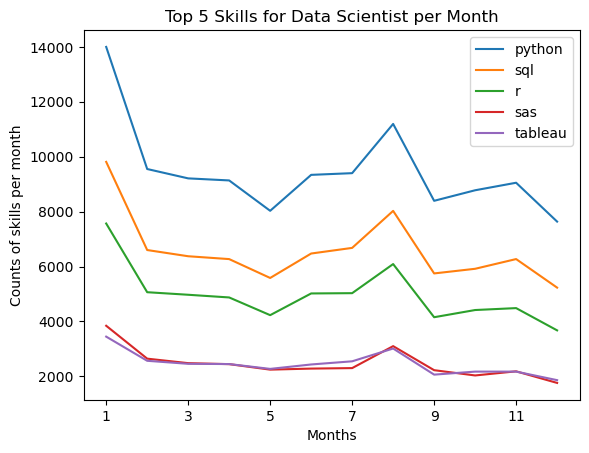

In [26]:
df_DS_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Scientist per Month')
plt.xlabel('Months')
plt.ylabel('Counts of skills per month')
plt.legend()
plt.show()